<a href="https://colab.research.google.com/github/nbegumc/Forest-cover-type-classification-using-AdaBoost/blob/main/Forest_Cover_Type_Classification_using_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning** / 2020-21 <br>
  ## Master in Data Science and Economics <br>
     Nazli Begum Cirpanli - 942345

> # **Forest Cover Type Classification Using AdaBoost**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Importing the Dataset from Kaggle

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazlbe","key":"91a835680d578840698c3fa308f3eaee"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d uciml/forest-cover-type-dataset

 89% 10.0M/11.2M [00:00<00:00, 42.9MB/s]
100% 11.2M/11.2M [00:00<00:00, 44.5MB/s]


In [7]:
!unzip forest-cover-type-dataset.zip

Archive:  forest-cover-type-dataset.zip
  inflating: covtype.csv             


In [8]:
# checking whether all the files have been downloaded to the directory
!ls

covtype.csv  forest-cover-type-dataset.zip  kaggle.json  sample_data


## **Dataset**

Forest cover type dataset, contains 54 attributes all of which are cartographic measures representing four wilderness areas located in the Roosevelt National Forest of northern Colorado. 

There are 10 quantitative and 44 binary variables. Target variable is cover type
which is also a quantitative variable ranging from 1 to 7. 

In [9]:
data= pd.read_csv('covtype.csv')
data.info()
data.shape
data.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

<bound method NDFrame.head of         Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0            2596      51      3  ...            0            0           5
1            2590      56      2  ...            0            0           5
2            2804     139      9  ...            0            0           2
3            2785     155     18  ...            0            0           2
4            2595      45      2  ...            0            0           5
...           ...     ...    ...  ...          ...          ...         ...
581007       2396     153     20  ...            0            0           3
581008       2391     152     19  ...            0            0           3
581009       2386     159     17  ...            0            0           3
581010       2384     170     15  ...            0            0           3
581011       2383     165     13  ...            0            0           3

[581012 rows x 55 columns]>

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


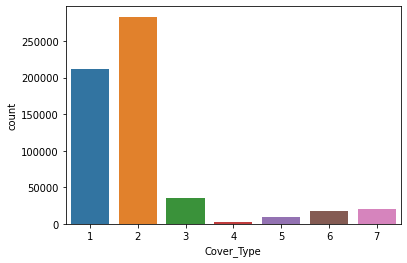

In [10]:
# checking, again, for the missing values
data.isna().sum()

In [ ]:
#distribution of cover types
ax = sns.countplot(x="Cover_Type", data=data)

In [11]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## **Predicting Cover Types with Adaboost**

In [13]:
X = data.drop(columns=['Cover_Type']).values
y = data['Cover_Type'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [14]:
np.isnan(X_train).any(), np.isnan(y).any()

(False, False)

In [21]:
class adaboost_multi:

  def __init__(self,n_learners=1):
    
    self.num_classes = np.unique(y)
    self.n_learners =n_learners
    self.alfas=None
    self.learners=None
    
    

  def __str__(self):
    return '%.d classes - %.d learners' % (self.num_classes,self.n_learners)

  def fit(self,X,y):
    
    m = X.shape[0]
    
    self.all_aphas=[]
    self.all_learners=[]
    
    for c in np.unique(y):
      
      y_temp = y.copy()
  
      index_i = y_temp == c
      y_temp[index_i] = 1
      y_temp[~index_i] = -1
                                 
      learners = []
      alphas = []
      sample_weights = np.zeros(shape=(self.n_learners, m))
      sample_weights[0] = np.ones(shape=m)/m  ###Initialize weights 
      
      for t in range(self.n_learners):

        ht = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        ht.fit(X, y_temp,sample_weight=sample_weights[t])
        preds = ht.predict(X)

                         
        error = sample_weights[t][(preds != y_temp)].sum() # loss function
        
        if error in [0,0.5,1]:
          break
        
        alpha = 0.5* np.log((1 - error) / (error)) #wi for hi

        next_weights = sample_weights[t] * np.exp(-alpha * y_temp * preds)
        next_weights /= next_weights.sum()

        if t + 1 < self.n_learners:
            sample_weights[t + 1] = next_weights

        learners.append(ht)
        alphas.append(alpha)

      self.all_aphas.append(alphas)
      self.all_learners.append(learners)
  
   

  def predict(self,X):
    c=np.unique(y)

    all_learners=self.all_learners
    prediction=np.array([[ht.predict(X) for ht in group] for group in all_learners])
    
    w_majority=[]
    for p in c:
      weighted_majority=np.sign(np.dot(self.all_aphas[p-1],prediction[p-1]))
      w_majority.append(weighted_majority)
    w_majority=np.asarray(w_majority) 
  
    categories=np.unique(y)
    
    final=categories[np.argmax(w_majority,axis=0)]
    
    return final

  def score(self, y_true, y_pred):
    return accuracy_score(y_true, y_pred)

  def get_error_rate(self,pred, y):
    return sum(pred != y) / float(len(y))



In [25]:
adaboost_clf=adaboost_multi(100)

In [26]:
adaboost_clf.fit(X_train,y_train)
predictions=adaboost_clf.predict(X_test)

In [27]:
accuracy_score(y_test,predictions)

0.6666398935193685

In [31]:
print(adaboost_clf.n_learners, "---" , adaboost_clf.num_classes)

100 --- [1 2 3 4 5 6 7]


In [32]:
np.unique(predictions)

array([1, 2, 3, 4, 7])

## **Different Values of the Number T of AdaBoost Rounds** 
T (number of learners) is the only parameter that can be tuned in Adaboost
algorithm. Therefore, in order to examine the changes in the error rate with
respect to the number of learners, algorithm has been run multiple times
with different numbers of T. 

Forest Cover Type dataset has 581,012 rows, thus executing the algorithm with higher number of learners takes a lot of time. To avoid long runtimes, a sample has been taken from the original data and used for examining the accuracy rates of the classifiers with respect to changing numbers of T. 100,000 rows have been taken randomly from the data with replacement and split into train and test sets by 30% again.

In [33]:
#smaller sample
sample=data.sample(100000,replace=True)
count= sample.count()  
count

Elevation                             100000
Aspect                                100000
Slope                                 100000
Horizontal_Distance_To_Hydrology      100000
Vertical_Distance_To_Hydrology        100000
Horizontal_Distance_To_Roadways       100000
Hillshade_9am                         100000
Hillshade_Noon                        100000
Hillshade_3pm                         100000
Horizontal_Distance_To_Fire_Points    100000
Wilderness_Area1                      100000
Wilderness_Area2                      100000
Wilderness_Area3                      100000
Wilderness_Area4                      100000
Soil_Type1                            100000
Soil_Type2                            100000
Soil_Type3                            100000
Soil_Type4                            100000
Soil_Type5                            100000
Soil_Type6                            100000
Soil_Type7                            100000
Soil_Type8                            100000
Soil_Type9

In [34]:
X = sample.drop(columns=['Cover_Type']).values
y = sample['Cover_Type'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

Accuracy rates and respective error rates with respect to number of learners
T have been plotted below.

In [35]:
acc_train, acc_test = [], []

for i in range(1,1000,50):    
  adaboost_clf = adaboost_multi(i)
  adaboost_clf.fit(X_train,y_train)
  preds=adaboost_clf.predict(X_train)
  acc_train.append(accuracy_score(y_train,preds))
  preds=adaboost_clf.predict(X_test)
  acc_test.append(accuracy_score(y_test,preds))
acc_train, acc_test  


([0.6321,
  0.6541857142857143,
  0.6728714285714286,
  0.6769285714285714,
  0.6787428571428571,
  0.6811142857142857,
  0.6814142857142858,
  0.6826571428571429,
  0.6852,
  0.6876714285714286,
  0.6895428571428571,
  0.6898857142857143,
  0.6904428571428571,
  0.6902428571428572,
  0.6907142857142857,
  0.6922857142857143,
  0.6923714285714285,
  0.6924285714285714,
  0.6927714285714286,
  0.693],
 [0.6259333333333333,
  0.6475333333333333,
  0.6654333333333333,
  0.6693333333333333,
  0.6713,
  0.6734666666666667,
  0.6735666666666666,
  0.6745,
  0.6776333333333333,
  0.6793666666666667,
  0.6815333333333333,
  0.6816666666666666,
  0.6824,
  0.6822666666666667,
  0.6827,
  0.6836666666666666,
  0.6832,
  0.6829,
  0.6835666666666667,
  0.6835])

In [36]:
x_axis=range(1,1000,50)

In [ ]:
plt.title('accuracy vs. iterations')
plt.title('error rate vs. iterations')


accuracy vs. iterations

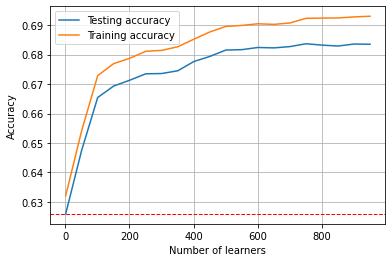

In [37]:

plt.plot(x_axis, acc_test, label='Testing accuracy')
plt.plot(x_axis, acc_train, label='Training accuracy')


plt.axhline(y=acc_test[0], linewidth=1, color = 'red', ls = 'dashed')
plt.legend()
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')

plt.grid(True)

plt.show()

error rate vs. iterations

In [38]:
err_train=[]
for i in range(0,len(acc_train)):
  err_train.append(1-acc_train[i])

err_test=[]
for x in range(0,len(acc_test)):
  err_test.append(1-acc_test[x])

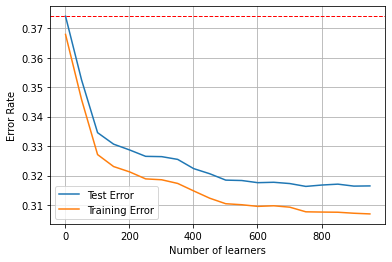

In [39]:

plt.plot(x_axis, err_test, label='Test Error')
plt.plot(x_axis, err_train, label='Training Error')


plt.axhline(y=err_test[0], linewidth=1, color = 'red', ls = 'dashed')
plt.legend()
plt.xlabel('Number of learners')
plt.ylabel('Error Rate')

plt.grid(True)

plt.show()